<a href="https://colab.research.google.com/github/CHIZIGWE/TSK/blob/main/CAPT_Union.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1060]:
#Watch out for bid success

# Data Preparation & Aggregation **bold text**

This section will involve looking at the dataset separately, conduction manipulation where appropriate and eventually combining all three datasets to see whe

In [1061]:
#Importing data wrangling and visualisation libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
from numpy.ma.core import outer
from decimal import Decimal

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from datetime import  datetime as dt
from dateutil import relativedelta
pd.options.display.float_format = '{:.2f}'.format #To format numerical output

In [1062]:
#Loading the three datasets
Deal_Performance = pd.read_excel(r'/content/drive/MyDrive/Captify_Task/deal-performance-data.xlsx')

bid_blue = pd.read_csv(r"/content/drive/MyDrive/Captify_Task/deal-bid-data-bluessp.csv")

bid_red = pd.read_csv(r"/content/drive/MyDrive/Captify_Task/deal-bid-data-redssp.csv")

In [1063]:
#Creating Function to Automate Sanity Check
def sanity_check(Dataset, Dataset_Name):
    print(Dataset_Name, 'Sanity Check: \n\n')
    print(Dataset.head()), '\n'
    print(f'{Dataset_Name} Rows and Columns: \n' ,Dataset.shape, '\n')
    print(f'{Dataset_Name} Column information: \n')
    Dataset.info()
    print('\n')
    print(f'{Dataset_Name} Missing information: \n',Dataset.isnull().sum(), '\n')
    print(f'{Dataset_Name} Duplicate information: \n',Dataset.duplicated().sum(), '\n')
    print(f'{Dataset_Name} Statistical Summary: \n',Dataset.describe(), '\n')
    print(f'End of {Dataset_Name} sanity check \n')


In [1064]:
#Sanity Check for Bid Red
sanity_check(bid_red, 'Bid Red')


Bid Red Sanity Check: 


    deal_id       month    bid_request        bids
0  Deal_149  01/01/2024         160.00           0
1  Deal_149  01/05/2024         160.00  2320359348
2  Deal_222  01/02/2024 45169671695.00  6431140982
3  Deal_222  01/04/2024 74806028011.00  5821454587
4  Deal_222  01/09/2024 68845194016.00           0
Bid Red Rows and Columns: 
 (1132, 4) 

Bid Red Column information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132 entries, 0 to 1131
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   deal_id      1132 non-null   object 
 1   month        1132 non-null   object 
 2   bid_request  1132 non-null   float64
 3   bids         1132 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 35.5+ KB


Bid Red Missing information: 
 deal_id        0
month          0
bid_request    0
bids           0
dtype: int64 

Bid Red Duplicate information: 
 0 

Bid Red Statistical Summa

In [1065]:
#Bid bld blue Sanity Check
sanity_check(bid_blue, 'Bid Blue')

Bid Blue Sanity Check: 


    deal_id       month     bid_request         bids
0  Deal_102  01/01/2024          160.00  11418560961
1  Deal_102  01/02/2024          160.00   4218636088
2  Deal_102  01/04/2024 287000000000.00   7902414504
3  Deal_102  01/05/2024          160.00  30286237905
4  Deal_102  01/06/2024 201000000000.00            0
Bid Blue Rows and Columns: 
 (748, 4) 

Bid Blue Column information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   deal_id      748 non-null    object 
 1   month        748 non-null    object 
 2   bid_request  748 non-null    float64
 3   bids         748 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 23.5+ KB


Bid Blue Missing information: 
 deal_id        0
month          0
bid_request    0
bids           0
dtype: int64 

Bid Blue Duplicate information: 
 0 

Bid Blue St

In [1066]:
#Deal Performance sanity check
sanity_check(Deal_Performance, 'Deal Performance')


Deal Performance Sanity Check: 


    deal_id          deal_name      month segment_type      ssp    advertiser            vertical office         tier media_type  kpi  kpi_value  gross_spend  media_cost  data_revenue  impressions  video_completes  clicks  media_margin
0  Deal_102  Deal_102_Campaign 2024-01-01   Cookieless  BLUESSP  Advertiser_1  Jobs and Education     UK  Growth Tier    Display  CTR       0.19       154.76      109.24         45.52        66474         50812.00  126.30         29.42
1  Deal_102  Deal_102_Campaign 2024-02-01   Cookieless  BLUESSP  Advertiser_1  Jobs and Education     UK  Growth Tier    Display  CPC       6.00       153.74      110.30         43.45         9900         12508.00   18.38         28.26
2  Deal_102  Deal_102_Campaign 2024-04-01   Cookieless  BLUESSP  Advertiser_1  Jobs and Education     UK  Growth Tier    Display  CTR       0.10       142.57      101.25         41.32        21614             1.00   21.61         28.98
3  Deal_102  Deal_102_

The Datasets present 0 missing data. However, the date column datatype is an object and must be changed to a much more appropriate datatype.

In [1067]:
#Converting both to datetime datatypes
bid_red['month'] = pd.to_datetime(bid_red['month'])
bid_blue['month'] = pd.to_datetime(bid_blue['month'])

#Checking that datatype change has taken place
bid_blue.info()
print('\n')
bid_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   deal_id      748 non-null    object        
 1   month        748 non-null    datetime64[ns]
 2   bid_request  748 non-null    float64       
 3   bids         748 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 23.5+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132 entries, 0 to 1131
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   deal_id      1132 non-null   object        
 1   month        1132 non-null   datetime64[ns]
 2   bid_request  1132 non-null   float64       
 3   bids         1132 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 35.5+ KB


Now we Concatenate the bidding datasets to develop a bigger picture of the bidding process.

In [1068]:
combined_bid = pd.concat([bid_blue, bid_red])

In [1069]:
#Sanity Check on the Concatenated Dataset
sanity_check(combined_bid, 'Combined Bid')

Combined Bid Sanity Check: 


    deal_id      month     bid_request         bids
0  Deal_102 2024-01-01          160.00  11418560961
1  Deal_102 2024-01-02          160.00   4218636088
2  Deal_102 2024-01-04 287000000000.00   7902414504
3  Deal_102 2024-01-05          160.00  30286237905
4  Deal_102 2024-01-06 201000000000.00            0
Combined Bid Rows and Columns: 
 (1880, 4) 

Combined Bid Column information: 

<class 'pandas.core.frame.DataFrame'>
Index: 1880 entries, 0 to 1131
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   deal_id      1880 non-null   object        
 1   month        1880 non-null   datetime64[ns]
 2   bid_request  1880 non-null   float64       
 3   bids         1880 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 73.4+ KB


Combined Bid Missing information: 
 deal_id        0
month          0
bid_request    0
bids        

Exploring the Deal Performance Dataset to see opprtunities for Data manipulation and wrangling

In [1070]:
Deal_Performance.head(20)

,deal_id,deal_name,month,segment_type,ssp,advertiser,vertical,office,tier,media_type,kpi,kpi_value,gross_spend,media_cost,data_revenue,impressions,video_completes,clicks,media_margin
0,Deal_102,Deal_102_Campaign,2024-01-01,Cookieless,BLUESSP,Advertiser_1,Jobs and Education,UK,Growth Tier,Display,CTR,0.19,154.76,109.24,45.52,66474,50812.00,126.30,29.42
1,Deal_102,Deal_102_Campaign,2024-02-01,Cookieless,BLUESSP,Advertiser_1,Jobs and Education,UK,Growth Tier,Display,CPC,6.00,153.74,110.30,43.45,9900,12508.00,18.38,28.26
2,Deal_102,Deal_102_Campaign,2024-04-01,Cookieless,BLUESSP,Advertiser_1,Jobs and Education,UK,Growth Tier,Display,CTR,0.10,142.57,101.25,41.32,21614,1.00,21.61,28.98
3,Deal_102,Deal_102_Campaign,2024-05-01,Cookieless,BLUESSP,Advertiser_1,Jobs and Education,UK,Growth Tier,Display,CPC,4.00,164.75,97.48,67.26,81433,1.00,24.37,40.83
4,Deal_102,Deal_102_Campaign,2024-06-01,Cookieless,BLUESSP,Advertiser_1,Jobs and Education,UK,Growth Tier,Display,CTR,0.10,172.89,101.11,71.78,89362,41537.00,89.36,41.52
5,Deal_102,Deal_102_Campaign,2024-08-01,Cookieless,BLUESSP,Advertiser_1,Jobs and Education,UK,Growth Tier,Display,CPC,4.00,162.35,104.80,57.55,1,118455.00,26.20,35.45
6,Deal_102,Deal_102_Campaign,2024-10-01,Cookieless,BLUESSP,Advertiser_1,Jobs and Education,UK,Growth Tier,Display,CTR,0.10,143.37,111.40,31.97,20190,1.00,20.19,22.30
7,Deal_102,Deal_102_Campaign,2024-11-01,Cookieless,BLUESSP,Advertiser_1,Jobs and Education,UK,Growth Tier,Display,CPC,6.00,165.59,110.56,55.03,78846,19981.00,18.43,33.23
8,Deal_102,Deal_102_Campaign,2024-12-01,Cookieless,BLUESSP,Advertiser_1,Jobs and Education,UK,Growth Tier,Display,CTR,0.10,151.64,95.11,56.54,27720,1.00,27.72,37.28
9,Deal_149,Deal_149_Campaign,2024-01-01,Cookie,REDSSP,Advertiser_2,Law and Government,UK,Below Minimum Threshold,Display,CTR,0.50,4.64,3.33,1.31,1,25265.00,0.01,28.16


Given that KPIs and their respecive values could form an integral part of the necessary analysis. The respective KPIs within the dataset should become variables alongside the existing variables.

In [1071]:
#First we created a pivot based on the advertiser and the various KPIs
pivoted = Deal_Performance.pivot_table(index = 'advertiser', columns = 'kpi', values = 'kpi_value').reset_index()

#Then we Merge this Deal Performance dataframe
Deal_Performance = pd.merge(Deal_Performance, pivoted, how= 'inner', on= 'advertiser')



In [1072]:
#The First five rows of the new dataframe
Deal_Performance.head()

,deal_id,deal_name,month,segment_type,ssp,advertiser,vertical,office,tier,media_type,kpi,kpi_value,gross_spend,media_cost,data_revenue,impressions,video_completes,clicks,media_margin,CPC,CTR,VTR
0,Deal_102,Deal_102_Campaign,2024-01-01,Cookieless,BLUESSP,Advertiser_1,Jobs and Education,UK,Growth Tier,Display,CTR,0.19,154.76,109.24,45.52,66474,50812.00,126.30,29.42,5.00,0.12,NaN
1,Deal_102,Deal_102_Campaign,2024-02-01,Cookieless,BLUESSP,Advertiser_1,Jobs and Education,UK,Growth Tier,Display,CPC,6.00,153.74,110.30,43.45,9900,12508.00,18.38,28.26,5.00,0.12,NaN
2,Deal_102,Deal_102_Campaign,2024-04-01,Cookieless,BLUESSP,Advertiser_1,Jobs and Education,UK,Growth Tier,Display,CTR,0.10,142.57,101.25,41.32,21614,1.00,21.61,28.98,5.00,0.12,NaN
3,Deal_102,Deal_102_Campaign,2024-05-01,Cookieless,BLUESSP,Advertiser_1,Jobs and Education,UK,Growth Tier,Display,CPC,4.00,164.75,97.48,67.26,81433,1.00,24.37,40.83,5.00,0.12,NaN
4,Deal_102,Deal_102_Campaign,2024-06-01,Cookieless,BLUESSP,Advertiser_1,Jobs and Education,UK,Growth Tier,Display,CTR,0.10,172.89,101.11,71.78,89362,41537.00,89.36,41.52,5.00,0.12,NaN


Above we can see that the dataframe has successfully incorporated the KPIs as part of the variables. Now we can combine both datasets

In [1073]:
Data = pd.merge(Deal_Performance, combined_bid, how= 'inner', on= 'deal_id')

In [1074]:
#First Five Rows of the new dataset
Data.head()

,deal_id,deal_name,month_x,segment_type,ssp,advertiser,vertical,office,tier,media_type,kpi,kpi_value,gross_spend,media_cost,data_revenue,impressions,video_completes,clicks,media_margin,CPC,CTR,VTR,month_y,bid_request,bids
0,Deal_102,Deal_102_Campaign,2024-01-01,Cookieless,BLUESSP,Advertiser_1,Jobs and Education,UK,Growth Tier,Display,CTR,0.19,154.76,109.24,45.52,66474,50812.00,126.30,29.42,5.00,0.12,NaN,2024-01-01,160.00,11418560961
1,Deal_102,Deal_102_Campaign,2024-01-01,Cookieless,BLUESSP,Advertiser_1,Jobs and Education,UK,Growth Tier,Display,CTR,0.19,154.76,109.24,45.52,66474,50812.00,126.30,29.42,5.00,0.12,NaN,2024-01-02,160.00,4218636088
2,Deal_102,Deal_102_Campaign,2024-01-01,Cookieless,BLUESSP,Advertiser_1,Jobs and Education,UK,Growth Tier,Display,CTR,0.19,154.76,109.24,45.52,66474,50812.00,126.30,29.42,5.00,0.12,NaN,2024-01-04,287000000000.00,7902414504
3,Deal_102,Deal_102_Campaign,2024-01-01,Cookieless,BLUESSP,Advertiser_1,Jobs and Education,UK,Growth Tier,Display,CTR,0.19,154.76,109.24,45.52,66474,50812.00,126.30,29.42,5.00,0.12,NaN,2024-01-05,160.00,30286237905
4,Deal_102,Deal_102_Campaign,2024-01-01,Cookieless,BLUESSP,Advertiser_1,Jobs and Education,UK,Growth Tier,Display,CTR,0.19,154.76,109.24,45.52,66474,50812.00,126.30,29.42,5.00,0.12,NaN,2024-01-06,201000000000.00,0


In [1075]:
#Remove the extra date column
Data = Data.drop('month_y', axis = 1)

In [1076]:
#Renaming the existing month column
Data = Data.rename(columns = {'month_x':'Date'})

In [1077]:
#Sanity check for combined Dataset
sanity_check(Data, 'Combined Dataset')

Combined Dataset Sanity Check: 


    deal_id          deal_name       Date segment_type      ssp    advertiser            vertical office         tier media_type  kpi  kpi_value  gross_spend  media_cost  data_revenue  impressions  video_completes  clicks  media_margin  CPC  CTR  VTR     bid_request         bids
0  Deal_102  Deal_102_Campaign 2024-01-01   Cookieless  BLUESSP  Advertiser_1  Jobs and Education     UK  Growth Tier    Display  CTR       0.19       154.76      109.24         45.52        66474         50812.00  126.30         29.42 5.00 0.12  NaN          160.00  11418560961
1  Deal_102  Deal_102_Campaign 2024-01-01   Cookieless  BLUESSP  Advertiser_1  Jobs and Education     UK  Growth Tier    Display  CTR       0.19       154.76      109.24         45.52        66474         50812.00  126.30         29.42 5.00 0.12  NaN          160.00   4218636088
2  Deal_102  Deal_102_Campaign 2024-01-01   Cookieless  BLUESSP  Advertiser_1  Jobs and Education     UK  Growth Tier    Displ

Most of the data is present. However, some advertisers do not use certain KPIs so the KPI categories are deemed null.

In [1078]:
Data.fillna(0, inplace= True)


**Data Aggregation**

Now we have successfully combined and cleaned the three datasets. It is time to construct an aggregated dataset that summarises the data of the various advertisers to conduct analysis and further investigations.

In [1079]:
DATAN = Data.select_dtypes(include=[np.number])

for col in DATAN.columns:
    median = DATAN[col].median()
    mean = DATAN[col].mean()

    if abs(median - mean) > 0.10 * mean:
        print(f"'{col}' should be aggregated via **median**")
    else:
        print(f"'{col}' should be aggregated via **mean**")

'kpi_value' should be aggregated via **median**
'gross_spend' should be aggregated via **median**
'media_cost' should be aggregated via **median**
'data_revenue' should be aggregated via **median**
'impressions' should be aggregated via **median**
'video_completes' should be aggregated via **median**
'clicks' should be aggregated via **median**
'media_margin' should be aggregated via **mean**
'CPC' should be aggregated via **median**
'CTR' should be aggregated via **mean**
'VTR' should be aggregated via **median**
'bid_request' should be aggregated via **median**
'bids' should be aggregated via **median**


In [1080]:
#Firstly we will create a calculated column to describe the bid success rate
Data['bid_rate'] = Data['bids']/Data['bid_request']
# Now we create an aggregated dataset
Data_Agg = Data.groupby(['advertiser']).agg({'segment_type': pd.Series.mode, 'vertical': pd.Series.mode, 'tier': pd.Series.mode, 'media_type': pd.Series.mode, 'Date':'max', 'gross_spend': 'median', 'media_cost': 'median',
                                           'data_revenue': 'median', 'impressions': 'median', 'video_completes': 'median', 'clicks': 'sum', 'media_margin': 'median', 'CPC': 'mean', 'CTR':'mean', 'VTR':'mean', 'bid_request': 'sum', 'bids': 'sum', 'bid_rate': 'mean'})

for col in ['segment_type', 'vertical', 'tier', 'media_type']:
    Data_Agg[col] = Data_Agg[col].astype(str) #Ensures that certain aggregated column have the correct datatype
Data_Agg.reset_index(inplace= True)

In [1081]:
#First rows of new dataset
Data_Agg.head()

,advertiser,segment_type,vertical,tier,media_type,Date,gross_spend,media_cost,data_revenue,impressions,video_completes,clicks,media_margin,CPC,CTR,VTR,bid_request,bids,bid_rate
0,Advertiser_1,Cookieless,Jobs and Education,Growth Tier,Display,2024-12-01,154.76,104.80,55.03,27720.00,12508.00,3353.10,33.23,5.00,0.12,0.00,6022480321404.00,612203155209,31891274.31
1,Advertiser_10,Cookieless,Retail,Below Minimum Threshold,Video,2025-02-01,121.95,61.46,56.52,31247.00,5075.40,20731.67,46.81,4.00,0.26,77.99,22720722647728.00,1333345362683,5718628.46
2,Advertiser_100,Cookieless,Travel,Mid-Tier,Video,2025-02-01,37.85,15.05,21.50,71807.00,57760.00,12722.28,57.36,4.00,0.30,70.77,24843172032477.00,2351876589913,20344455.64
3,Advertiser_101,Cookieless,Alcohol,White Glove,Video,2025-02-01,0.76,0.38,0.40,1.00,1.00,7631.20,51.03,4.00,0.31,75.00,16386449370972.00,1516421046670,15608215.07
4,Advertiser_102,Cookie,Style and Fashion,Below Minimum Threshold,Video,2024-12-01,1.67,0.96,0.70,30656.00,18884.10,2532.87,41.95,0.00,0.36,74.13,2616000002880.00,185088475542,15781298.47


In [1082]:
#Sanity Check
sanity_check(Data_Agg, 'Aggregated Dataset')

Aggregated Dataset Sanity Check: 


       advertiser segment_type            vertical                     tier media_type       Date  gross_spend  media_cost  data_revenue  impressions  video_completes   clicks  media_margin  CPC  CTR   VTR       bid_request           bids    bid_rate
0    Advertiser_1   Cookieless  Jobs and Education              Growth Tier    Display 2024-12-01       154.76      104.80         55.03     27720.00         12508.00  3353.10         33.23 5.00 0.12  0.00  6022480321404.00   612203155209 31891274.31
1   Advertiser_10   Cookieless              Retail  Below Minimum Threshold      Video 2025-02-01       121.95       61.46         56.52     31247.00          5075.40 20731.67         46.81 4.00 0.26 77.99 22720722647728.00  1333345362683  5718628.46
2  Advertiser_100   Cookieless              Travel                 Mid-Tier      Video 2025-02-01        37.85       15.05         21.50     71807.00         57760.00 12722.28         57.36 4.00 0.30 70.77 24843

# **Feature Engineering**

There is no misssing data.

Now we create a Column to numerically classify churned v unchurned customers.

In [1083]:
#Firstly, we create a variable called current time
current_time = dt.now()

#Then we create a column to stating the difference between today, and the last transaction

Data_Agg['months_since_last_transaction'] = round((current_time - Data_Agg['Date']).dt.days/30, 1)


#Given the business rule that customers with a most recent purchase date of more than 6 months are considered churned.

Data_Agg['churned'] = np.where(Data_Agg['months_since_last_transaction'] > 6, 1, 0)

Data_Agg['churned_category'] = np.where(Data_Agg['months_since_last_transaction'] > 6, 'Churned', 'Active')
Data_Agg['churned'] = Data_Agg['churned'].astype('int')


Media Margin Classification:

Conducting statistical analysis between Media margin and other variables can be bolstered by classifying media_margin into 4 separate categories

In [1084]:
#Classifying the respective advertisers
Data_Agg['media_margin_category'] = pd.qcut(Data_Agg['media_margin'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
Data_Agg['media_margin_category']= Data_Agg['media_margin_category'].astype('category')

#Providing an equivalent numerical classification
Data_Agg['media_margin_category_num'] = pd.qcut(Data_Agg['media_margin'], q=4, labels=[1, 2, 3, 4])

In [1085]:
#Final Sanity Check
sanity_check(Data_Agg, 'Aggregated Dataset')


Aggregated Dataset Sanity Check: 


       advertiser segment_type            vertical                     tier media_type       Date  gross_spend  media_cost  data_revenue  impressions  video_completes   clicks  media_margin  CPC  CTR   VTR       bid_request           bids    bid_rate  months_since_last_transaction  churned churned_category media_margin_category media_margin_category_num
0    Advertiser_1   Cookieless  Jobs and Education              Growth Tier    Display 2024-12-01       154.76      104.80         55.03     27720.00         12508.00  3353.10         33.23 5.00 0.12  0.00  6022480321404.00   612203155209 31891274.31                           3.80        0           Active                   Low                         1
1   Advertiser_10   Cookieless              Retail  Below Minimum Threshold      Video 2025-02-01       121.95       61.46         56.52     31247.00          5075.40 20731.67         46.81 4.00 0.26 77.99 22720722647728.00  1333345362683  5718628.46  

Although there is no missing data. Although CTR and VTR are both rate metrics, the dataset stores them on different scales: CTR as a proportion (0–1) and VTR as a percentage (0–100). For consistency in analysis and modeling, I will scale them to the same unit before proceeding.

In [1086]:
Data_Agg['CTR'] = Data_Agg['CTR']*100
Data_Agg.head()

,advertiser,segment_type,vertical,tier,media_type,Date,gross_spend,media_cost,data_revenue,impressions,video_completes,clicks,media_margin,CPC,CTR,VTR,bid_request,bids,bid_rate,months_since_last_transaction,churned,churned_category,media_margin_category,media_margin_category_num
0,Advertiser_1,Cookieless,Jobs and Education,Growth Tier,Display,2024-12-01,154.76,104.80,55.03,27720.00,12508.00,3353.10,33.23,5.00,11.80,0.00,6022480321404.00,612203155209,31891274.31,3.80,0,Active,Low,1
1,Advertiser_10,Cookieless,Retail,Below Minimum Threshold,Video,2025-02-01,121.95,61.46,56.52,31247.00,5075.40,20731.67,46.81,4.00,25.67,77.99,22720722647728.00,1333345362683,5718628.46,1.70,0,Active,Medium,2
2,Advertiser_100,Cookieless,Travel,Mid-Tier,Video,2025-02-01,37.85,15.05,21.50,71807.00,57760.00,12722.28,57.36,4.00,29.53,70.77,24843172032477.00,2351876589913,20344455.64,1.70,0,Active,Very High,4
3,Advertiser_101,Cookieless,Alcohol,White Glove,Video,2025-02-01,0.76,0.38,0.40,1.00,1.00,7631.20,51.03,4.00,30.83,75.00,16386449370972.00,1516421046670,15608215.07,1.70,0,Active,High,3
4,Advertiser_102,Cookie,Style and Fashion,Below Minimum Threshold,Video,2024-12-01,1.67,0.96,0.70,30656.00,18884.10,2532.87,41.95,0.00,35.67,74.13,2616000002880.00,185088475542,15781298.47,3.80,0,Active,Medium,2


Automating EDA tools

In [1087]:
#Automating Shapiro Wilk Test for normality
def Shapiro_Wilk(dataset, variable, variable_title, alpha = 0.05):
  stat, p = shapiro(dataset[variable])
  print('Statistics=%.3f, p=%.3f' % (stat, p))
  if p > alpha:
    print(f'{variable_title} likely has a normal distribution')
  else:
    print(f'{variable_title} does not have a normal distribution')


In [1088]:
#Automating the creation of Histogram_Boxplot
from scipy.stats import shapiro, probplot
def Histogram_Boxplots(dataset, variable, title, xlabel, Color1, Color2):
  fig, ax = plt.subplots(2, 1, sharex= False)

  sns.histplot(dataset[variable], ax= ax[0], color= Color1, bins = 6, kde= True)
  ax[0].set_title(title, fontsize= 15)
  ax[0].set_xlabel('')

  sns.boxplot(x= dataset[variable], ax= ax[1], color= Color2, showmeans = True)
  ax[1].set_xlabel(xlabel, fontsize= 10)
  plt.show()

#Automating the creation of countplot
def univariate_countplot(dataset, variable, title, xlabel, ylabel, Color1):
  sns.countplot(x= dataset[variable], palette= 'bright')
  plt.title(title, fontsize= 15)
  plt.xlabel(xlabel, fontsize= 10)
  plt.ylabel(ylabel, fontsize= 10)
  plt.show()

#Multivariate Countplot
def multivariate_countplot(dataset, variable1, variable2, title, xlabel, ylabel, Color1):
  sns.countplot(x= dataset[variable1], hue= dataset[variable2], palette= 'bright')
  plt.title(title, fontsize= 15)
  plt.xlabel(xlabel, fontsize= 10)
  plt.ylabel(ylabel, fontsize= 10)
  plt.legend(fontsize = 10, loc = 'upper left')
  plt.show()

#Automate Barplot creation
def barplot(dataset, variable1, variable2, title, xlabel, ylabel):
  sns.barplot(x= dataset[variable1], y= dataset[variable2], palette= 'bright')
  plt.title(title, fontsize= 15)
  plt.xlabel(xlabel, fontsize= 10)
  plt.ylabel(ylabel, fontsize= 10)
  plt.show()

#Automating the creation of correlation plot
def correlation_plot(dataset, title, variable1, variable2, Color):
  sns.regplot(x= dataset[variable1], y= dataset[variable2], color= Color)
  plt.title(title, fontsize= 15)


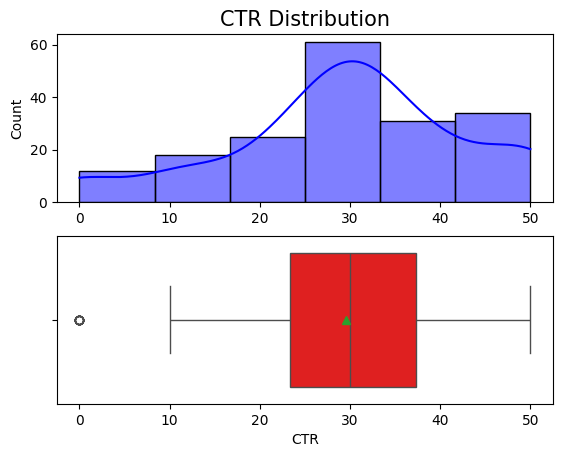

In [1089]:
#Checking the CTR distribution
Histogram_Boxplots(Data_Agg, 'CTR', 'CTR Distribution', 'CTR', 'blue', 'red')

The distribution is slightly right-skewed, with most CTR values concentrated between 20% and 40%.

The mean (green triangle) and median (central line) are close, indicating mild skewness.

The low CTR outlier near 0.0, as shown in the boxplot.

The CTR range spans from around 0 to 50%, with a relatively balanced spread.

Overall, the CTRs are fairly normally distributed with a moderate tail on the lower end.

However, we will verify with a Shapiro Wilk Test.



In [1090]:
#Making sure distribution is normal
Shapiro_Wilk(Data_Agg, 'CTR', 'Click Through Rate')

Statistics=0.946, p=0.000
Click Through Rate does not have a normal distribution


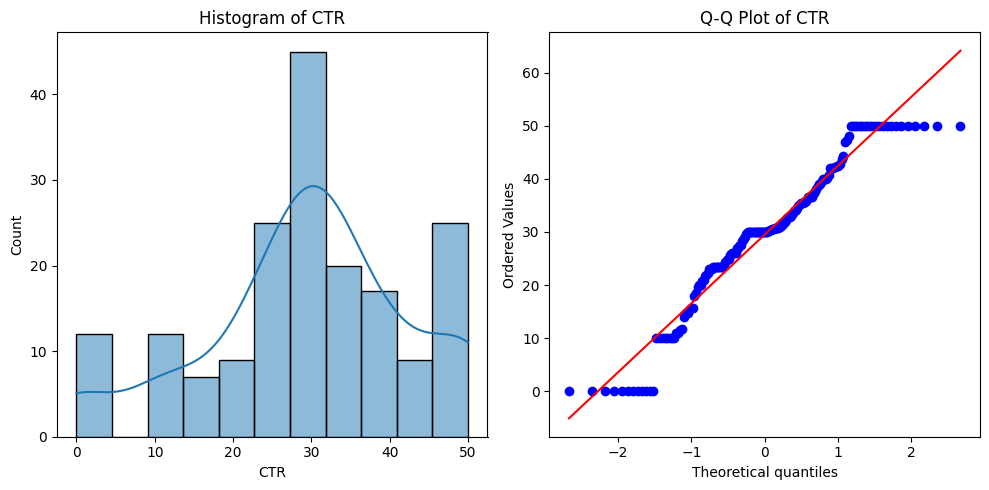

Statistics=0.946, p=0.000
Click Through Rate does not have a normal distribution


In [1091]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(Data_Agg['CTR'], kde=True)
plt.title('Histogram of CTR')

plt.subplot(1, 2, 2)
probplot(Data_Agg['CTR'], plot=plt)
plt.title('Q-Q Plot of CTR')

plt.tight_layout()
plt.show()

# Shapiro-Wilk test
Shapiro_Wilk(Data_Agg, 'CTR', 'Click Through Rate')

Given the v

The CTR data isn’t normally distributed — the histogram shows right skew, and the Q-Q plot deviates from the diagonal, especially in the tails. This suggests I may need to transform the data or use non-parametric methods for analysis.

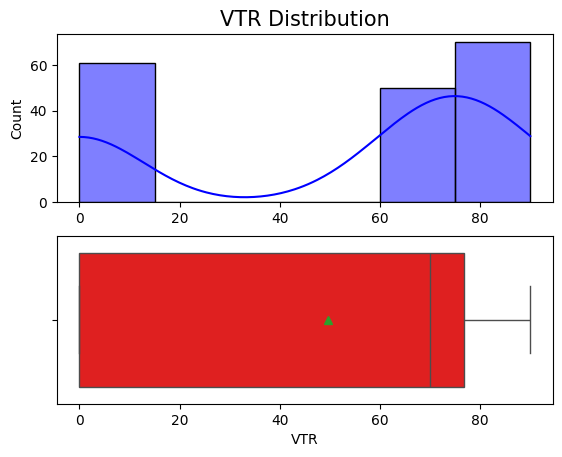

In [1092]:
#VTR Distribution
Histogram_Boxplots(Data_Agg, 'VTR', 'VTR Distribution', 'VTR', 'blue', 'red')

The bimodal distribution in VTR arises because:

Some advertisers don't use VTR at all, resulting in very low (~0%) rates.

Others actively optimize for VTR, producing high values (70–90%).

The gap in the middle (20–60%) suggests that advertisers either fully engage with VTR metrics or not at all — there's little in-between.

This reinforces the idea of distinct advertiser behaviors or strategies in the dataset.

Given the other than normal distribution. Non-parametric tests are appropriate here

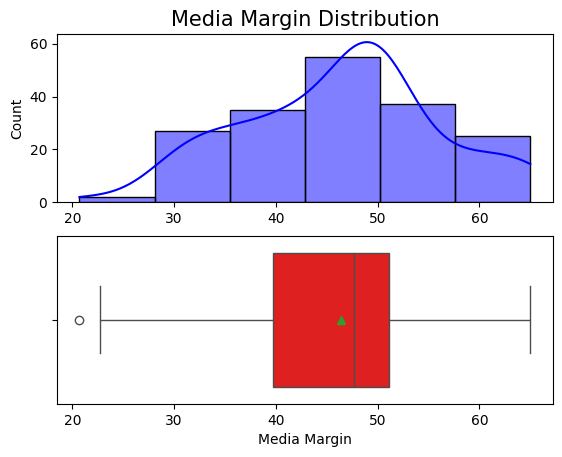

In [1093]:
#Media Margin Distribution
Histogram_Boxplots(Data_Agg, 'media_margin', 'Media Margin Distribution', 'Media Margin', 'blue', 'red')

In [1094]:
#Testing for normality



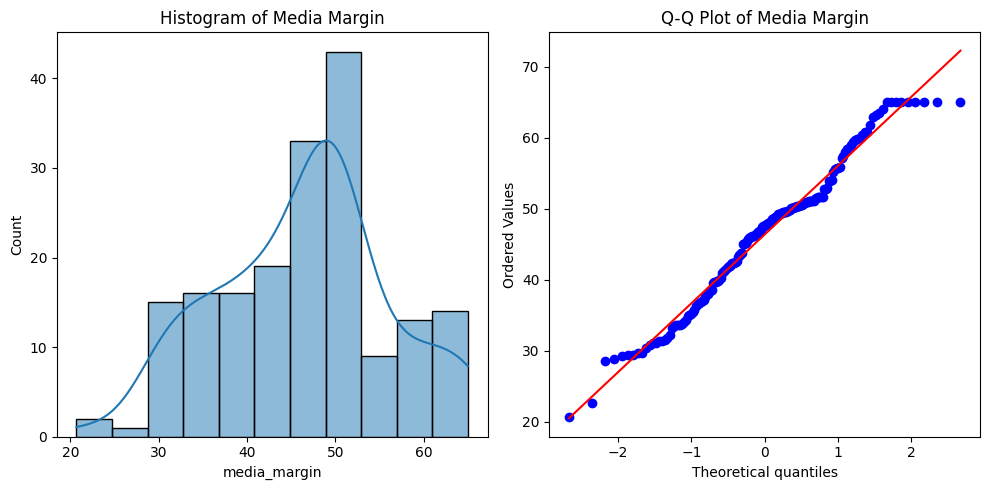

Statistics=0.979, p=0.007
media_margin does not have a normal distribution


In [1095]:
#Testing for non normality
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(Data_Agg['media_margin'], kde=True)
plt.title('Histogram of Media Margin')

plt.subplot(1, 2, 2)
probplot(Data_Agg['media_margin'], plot=plt)
plt.title('Q-Q Plot of Media Margin')

plt.tight_layout()
plt.show()

# Shapiro-Wilk test
Shapiro_Wilk(Data_Agg, 'media_margin', 'media_margin')

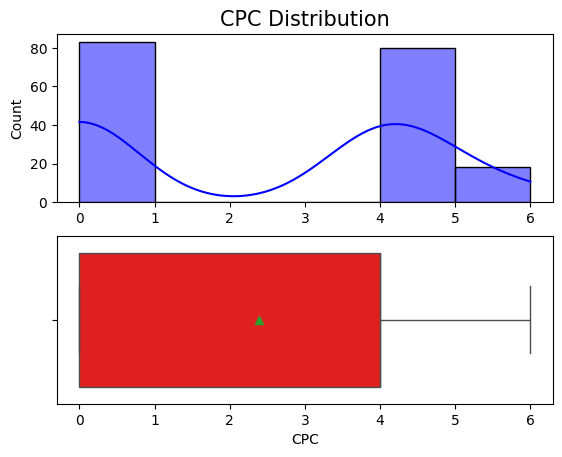

In [1096]:
#Checking Cost Per Click for Normality

Histogram_Boxplots(Data_Agg, 'CPC', 'CPC Distribution', 'CPC', 'blue', 'red')

The distribution is bimodal — there are two distinct peaks: one between 0 and 1 and one between 4 and 5.

This shape violates the assumption of unimodality and symmetry expected in a normal distribution.

There is also a large dip between 2 and 3, which further stresses that this is not normally distributed.

Given the non normality of our metrics. We will be using non parametric tests

# Statistical Testing

In this section, we will be conducting statistical tests to assess the strength of the relationship between Media Margin and various performance metrics such as CTR and VTR.

We will also assess the impact of the Media Margin Rate on Churn.

In [1097]:
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency

In [1098]:
#Automating Statistical Tests
def Spearman_Correlation(dataset, variable1, variable2, alpha = 0.05):
  corr_coef, p_value = spearmanr(dataset[variable1], dataset[variable2])
  print(f"Spearman's correlation coefficient: {corr_coef}")
  print(f"p-value: {p_value}")

  if p_value < alpha:
    print(f"There is a statistically significant correlation between {variable1} and {variable2}")
  else:
    print(f"There is no statistically significant correlation between {variable1} and {variable2}")


def Chi_Squared(dataset, variable1, variable2, alpha = 0.05):
  table = pd.crosstab(index = dataset[variable1], columns = dataset[variable2])
  chi2, p_value, dof, expected = chi2_contingency(table)
  print(f"Chi-squared statistic: {chi2}")
  print(f"p-value: {p_value}")

  if p_value < alpha:
    print(f"There is a statistically significant correlation between {variable1} and {variable2}")
  else:
    print(f"There is no statistically significant correlation between {variable1} and {variable2}")

Assessing the relationship between Media Margin and CTR

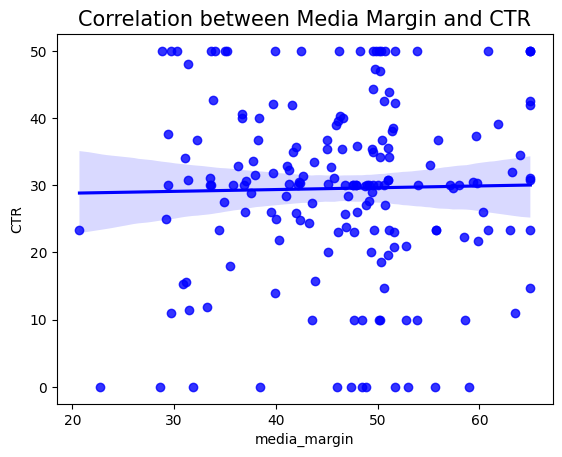

In [1099]:
#Assessing the relationship between Media Margin Rate and CTR
correlation_plot(Data_Agg, 'Correlation between Media Margin and CTR', 'media_margin', 'CTR', 'blue')

In [1100]:
Spearman_Correlation(Data_Agg, 'media_margin', 'CTR')

Spearman's correlation coefficient: -0.015123375764271405
p-value: 0.8398650158946214
There is no statistically significant correlation between media_margin and CTR


Given the extremely low correlation coefficient -0.015 and high p value 0.84. This means there is a statisticall insignificant correlation between Media Margin rates and CTR.

Assessing the relationship between Media Margin Rates and Viewed Through Rate

In [1101]:
Spearman_Correlation(Data_Agg, 'media_margin', 'VTR')

Spearman's correlation coefficient: 0.1103690795052569
p-value: 0.13911377176379539
There is no statistically significant correlation between media_margin and VTR


Once again, the relationship betweem Media Margin and Viewed Through Rate is not only weak. But statistically insignificant.

The P value means means that we fail to reject the null hypothesis that margin rate has no effect on Viewed Through Rates

Assessing the relationship between Media Margin Cost and CPC

In [1102]:
Spearman_Correlation(Data_Agg, 'media_margin', 'CPC')

Spearman's correlation coefficient: -0.047552858483228516
p-value: 0.5249812896493969
There is no statistically significant correlation between media_margin and CPC


There is no meaningful relationship between Media Margin and CPC in the data. The correlation is very weak and not statistically significant, indicating that changes in CPC do not appear to impact Media Margin.

Assessing the relationshio between Media Margin Rates and Churn

In [1103]:
Chi_Squared(Data_Agg, 'media_margin_category', 'churned')

Chi-squared statistic: 6.525956940280389
p-value: 0.0886444281745948
There is no statistically significant correlation between media_margin_category and churned


Once again Media Margin has no statisticlly effect on Churn. Given the p value, 0.08, is greater than alpha. We fail to reject the null hypothesis that media margin rates have no effect on churn.

A Summary view of the statistically insignificant relationship between Media Margin and Churn.

<ipython-input-1104-426b0ef5b587>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(Data_Agg, x= 'media_margin_category', y= 'CTR', palette= 'bright')
<ipython-input-1104-426b0ef5b587>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(Data_Agg, x = 'media_margin_category', y= 'VTR', palette ='bright')
<ipython-input-1104-426b0ef5b587>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(Data_Agg, x= 'media_margin_category', y= 'CPC', palette= 'bright')
<ipython-input-1104-426b0ef5b587>:16: FutureWarning: 

Passing `palette` without assigning `hue

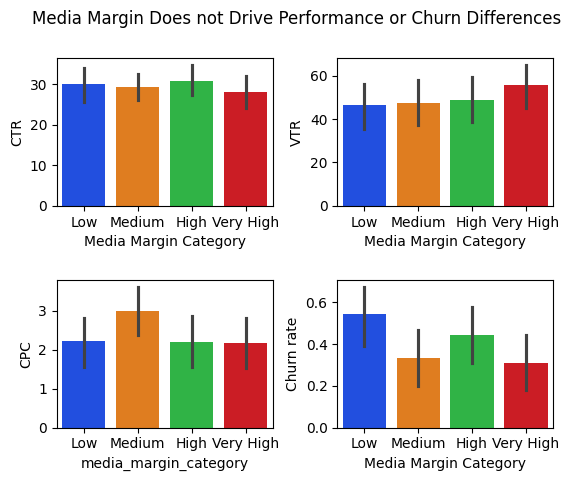

In [1104]:
plt.subplot(2, 2, 1)
plt.suptitle('Media Margin Does not Drive Performance or Churn Differences')
sns.barplot(Data_Agg, x= 'media_margin_category', y= 'CTR', palette= 'bright')
plt.title('', fontsize= 15)
plt.xlabel('Media Margin Category', fontsize= 10)
plt.subplot(2, 2, 2
            )
sns.barplot(Data_Agg, x = 'media_margin_category', y= 'VTR', palette ='bright')
plt.title('', fontsize= 15)
plt.xlabel('Media Margin Category', fontsize= 10)
plt.subplot(2, 2, 3)
sns.barplot(Data_Agg, x= 'media_margin_category', y= 'CPC', palette= 'bright')
plt.title('', fontsize= 15)

plt.subplot(2, 2, 4)
sns.barplot(Data_Agg, x= 'media_margin_category', y= 'churned', palette= 'bright')
plt.xlabel('Media Margin Category', fontsize= 10)
plt.ylabel('Churn rate', fontsize= 10)
plt.title('', fontsize= 15)
plt.subplots_adjust(hspace=0.5, wspace= 0.3)
plt.show()


Given the fact that Media Margin rates has so far not been shown to have any statistically significant impact on churn or campaign links we investigate other potential causes of churn.

# Alternate Investigations



A volume based approach to seeing the effect of Media Margin on Churn

In [1105]:
#Automating Cross tabulation

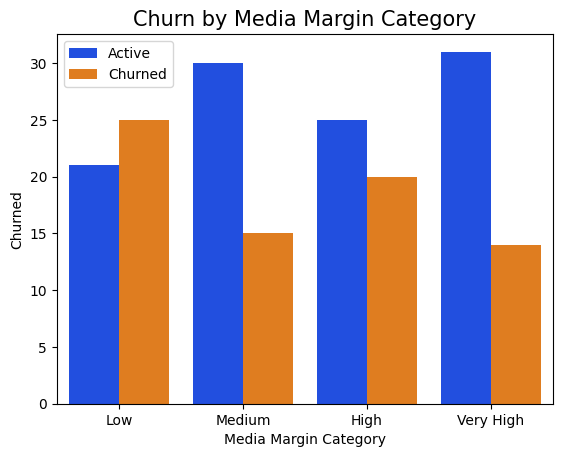

In [1106]:
multivariate_countplot(Data_Agg, 'media_margin_category', 'churned_category', 'Churn by Media Margin Category', 'Media Margin Category', 'Churned', 'blue')

Here we that a high Media Margin does not necessarily affect churning outcomes as the high churn rate dispropotionately come back people in the lowest margin category.

In [1107]:
#Automating Crosstabulation
def crosstab(dataset, variable1, variable2, xlabel, ylabel):
  crosstab = pd.crosstab(dataset[variable1], dataset[variable2])
  crosstab.index.name = xlabel
  crosstab.columns.name = ylabel
  crosstab['Total'] = crosstab.sum(axis=1)
  crosstab.loc['Total'] = crosstab.sum(axis=0)
  crosstab['% of churned'] = (crosstab[ylabel]/74) * 100
  crosstab['Churn Rate'] = (crosstab['Churned']/crosstab['Total']) * 100
  crosstab['% of Total'] = (crosstab['Total']/181) * 100
  crosstab['distance_from_mean'] = crosstab['Churn Rate'] - crosstab['Churn Rate'].mean()
  crosstab['SD from mean'] = round(crosstab['distance_from_mean']/crosstab['Churn Rate'].std(),2)
  crosstab = crosstab.sort_values(by= 'SD from mean', ascending= False)
  #crosstab['distance_from_mean'] = crosstab['% of churned'] - crosstab['Churned Rate'].mean()
  return crosstab

In [1108]:
#Assessing Churn Via Media Margin Category
crosstab(Data_Agg, 'media_margin_category', 'churned_category', 'Media Margin Category', 'Churned')

Churned,Active,Churned,Total,% of churned,Churn Rate,% of Total,distance_from_mean,SD from mean
Media Margin Category,,,,,,,,
Low,21,25,46,33.78,54.35,25.41,13.52,1.45
High,25,20,45,27.03,44.44,24.86,3.62,0.39
Total,107,74,181,100.00,40.88,100.00,0.06,0.01
Medium,30,15,45,20.27,33.33,24.86,-7.49,-0.80
Very High,31,14,45,18.92,31.11,24.86,-9.71,-1.04


In [1109]:
#Assessing Churn Via Vertical
crosstab(Data_Agg, 'vertical', 'churned_category', 'Vertical', 'Churned')
#crosstab.sort_values(by= 'SD from mean', ascending= False)
#Sort by SD mean


Churned,Active,Churned,Total,% of churned,Churn Rate,% of Total,distance_from_mean,SD from mean
Vertical,,,,,,,,
Home and Garden,3,6,9,8.11,66.67,4.97,31.28,1.46
Finance,5,7,12,9.46,58.33,6.63,22.95,1.07
Jobs and Education,5,6,11,8.11,54.55,6.08,19.16,0.90
Automotive,5,5,10,6.76,50.00,5.52,14.61,0.68
Food and Drink,5,5,10,6.76,50.00,5.52,14.61,0.68
Retail,11,10,21,13.51,47.62,11.60,12.23,0.57
Gambling,7,6,13,8.11,46.15,7.18,10.77,0.50
Alcohol,6,5,11,6.76,45.45,6.08,10.07,0.47
Total,107,74,181,100.00,40.88,100.00,5.50,0.26


In [1110]:
#Assesisng Churn by Tier
crosstab(Data_Agg, 'tier', 'churned_category', 'Tier', 'Churned')

Churned,Active,Churned,Total,% of churned,Churn Rate,% of Total,distance_from_mean,SD from mean
Tier,,,,,,,,
Below Minimum Threshold,36,31,67,41.89,46.27,37.02,6.42,1.18
Growth Tier,30,22,52,29.73,42.31,28.73,2.46,0.45
Total,107,74,181,100.00,40.88,100.00,1.03,0.19
White Glove,13,8,21,10.81,38.10,11.60,-1.76,-0.32
Mid-Tier,28,13,41,17.57,31.71,22.65,-8.15,-1.50


#Creating ML model to find drivers of churn.

In [1111]:
from sklearn.preprocessing import RobustScaler #Excellent for scaling Data with non-normal and skewed distributions
from sklearn.model_selection import train_test_split #To split the data into training and testing buckets
from sklearn.linear_model import LogisticRegression #Model
from sklearn.ensemble import RandomForestClassifier #Model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report #model accuracy
from statsmodels.stats.outliers_influence import variance_inflation_factor #Variance Inflation Factor

In [1112]:
#Selecting the numerical variables
numerical_variables = Data_Agg.select_dtypes(include=[np.number])

numerical_variables.columns

Index(['gross_spend', 'media_cost', 'data_revenue', 'impressions', 'video_completes', 'clicks', 'media_margin', 'CPC', 'CTR', 'VTR', 'bid_request', 'bids', 'bid_rate', 'months_since_last_transaction', 'churned'], dtype='object')

In [1113]:
#Splitting Data into dependent and independent variables and removing variables thats could cause data leakage
X = numerical_variables.drop(['churned', 'months_since_last_transaction'], axis = 1)
y = numerical_variables['churned']

In [1114]:
#Variance inflation factor for dependent variable
VIF = pd.DataFrame()
VIF['variables'] = X.columns
VIF['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
VIF

,variables,VIF
0,gross_spend,8527.81
1,media_cost,2922.85
2,data_revenue,1766.57
3,impressions,1.59
4,video_completes,1.35
5,clicks,4.84
6,media_margin,0.54
7,CPC,1.76
8,CTR,1.08
9,VTR,1.61


In [1115]:
#Given this VIF we drop
X = X.drop(['media_cost', 'data_revenue', 'gross_spend'], axis = 1)
VIF = pd.DataFrame()
VIF['variables'] = X.columns
VIF['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
VIF

,variables,VIF
0,impressions,1.55
1,video_completes,1.34
2,clicks,4.82
3,media_margin,0.45
4,CPC,1.63
5,CTR,1.02
6,VTR,1.51
7,bid_request,8.52
8,bids,5.16
9,bid_rate,1.19


In [1116]:
#Scaling the dependent variables
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
#converting them back into dataframe
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [1117]:
#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [1118]:
#Fitting the data onto the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [1119]:
##printing coefficient
Coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
Coefficients['Odds Ratio'] = np.exp(Coeffficients['Coefficient'])
Coefficients['% Change in odds of churn outcome'] = (Coeffficients['Odds Ratio'] - 1) * 100
Coefficients.sort_values(by= '% Change in odds of churn outcome', ascending= True)
Coefficients_ = Coefficients[['Feature','% Change in odds of churn outcome']]
Coefficients_.sort_values(by= '% Change in odds of churn outcome', ascending= True)

,Feature,% Change in odds of churn outcome
8,bids,-74.97
2,clicks,-68.08
6,VTR,-61.85
4,CPC,-61.19
7,bid_request,-60.46
3,media_margin,-24.45
9,bid_rate,-22.28
0,impressions,-19.33
5,CTR,5.18
1,video_completes,27.09


In [1120]:
model.score(X_test, y_test)

0.8108108108108109

In [1121]:
#Classification Matrix
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[19,  6],
       [ 1, 11]])

In [1122]:
#Recall, Precision, F1 Scors
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.76      0.84        25
           1       0.65      0.92      0.76        12

    accuracy                           0.81        37
   macro avg       0.80      0.84      0.80        37
weighted avg       0.85      0.81      0.82        37



In [1123]:
#For further illumination on the magnitude of the variables we build a Random Forest model
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier()

In [1124]:
RF.score(X_test, y_test)

0.7297297297297297

In [1125]:
RF = pd.DataFrame({'Feature': X.columns, 'Importance': RF.feature_importances_})
RF.sort_values(by= 'Importance', ascending= False)

,Feature,Importance
2,clicks,0.20
8,bids,0.20
7,bid_request,0.18
9,bid_rate,0.11
0,impressions,0.06
5,CTR,0.06
3,media_margin,0.06
6,VTR,0.05
1,video_completes,0.04
4,CPC,0.03
